# Cancer Dignosis Data

# 1. Business Problem

## 1.1 Problem Description

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

# 2 Machine Learning Problem Formulation

## 2.1 Data Overview

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
 There are nine different classes a genetic mutation can be classified into => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


### 2.3 Example of Data point

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h3>2.3.2. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

## 2.4 Source & Useful links

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv('training_variants')
print('Number of data_point is:-{} and Number of features/variables is:-{}'.format(data.shape[0],data.shape[1]))
print('Features :',data.columns.values)
data.head()

Number of data_point is:-3321 and Number of features/variables is:-4
Features : ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
data_text=pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data_point is:-{} and Number of features/variables is:-{}'.format(data_text.shape[0],data_text.shape[1]))
print('Features :',data_text.columns.values)
data_text.head()

Number of data_point is:-3321 and Number of features/variables is:-2
Features : ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
final=pd.merge(data,data_text,on='ID',how='left')
final.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [14]:
data_nan = (final.isnull().sum() / len(final)) * 100
data_nan = data_nan.drop(data_nan[data_nan == 0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'Missing Ratio' :data_nan})
missing_data.head(5)

,Missing Ratio
TEXT,0.150557


Text(0.5, 1.0, 'Percent missing on Training data by feature')

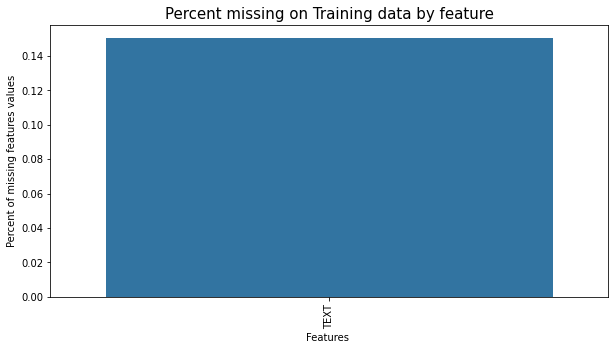

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='90')
sns.barplot(x=data_nan.index, y=data_nan)
plt.xlabel('Features ', fontsize=10)
plt.ylabel('Percent of missing features values', fontsize=10)
plt.title('Percent missing on Training data by feature', fontsize=15)

In [7]:
test=pd.read_csv('test_variants')
print('Number of data_point is:-{} and Number of features/variables is:-{}'.format(test.shape[0],test.shape[1]))
print('Features :',test.columns.values)
test.head()

Number of data_point is:-5668 and Number of features/variables is:-3
Features : ['ID' 'Gene' 'Variation']


,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [8]:
test_text=pd.read_csv("test_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data_point is:-{} and Number of features/variables is:-{}'.format(test_text.shape[0],test_text.shape[1]))
print('Features :',test_text.columns.values)
test_text.head()

Number of data_point is:-5668 and Number of features/variables is:-2
Features : ['ID' 'TEXT']


,ID,TEXT
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [9]:
test_final=pd.merge(test,test_text,on='ID',how='left')
test_final.head()

,ID,Gene,Variation,TEXT
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [16]:
data_nan = (test_final.isnull().sum() / len(test_final)) * 100
data_nan = data_nan.drop(data_nan[data_nan == 0].index).sort_values(ascending=False)[:10]
missing_data = pd.DataFrame({'Missing Ratio' :data_nan})
missing_data.head(5)

,Missing Ratio
TEXT,0.017643


Text(0.5, 1.0, 'Percent missing on Testing data by feature')

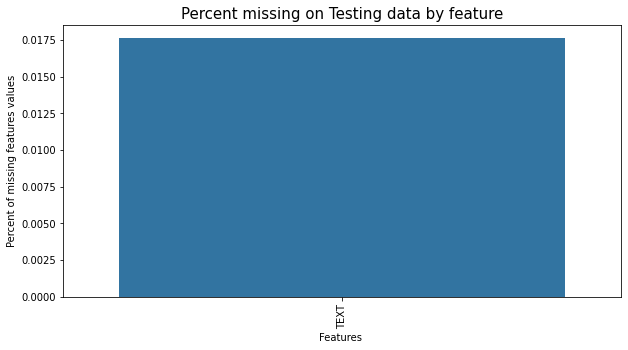

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='90')
sns.barplot(x=data_nan.index, y=data_nan)
plt.xlabel('Features ', fontsize=10)
plt.ylabel('Percent of missing features values', fontsize=10)
plt.title('Percent missing on Testing data by feature', fontsize=15)

In [10]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        final[column][index] = string

In [11]:
#text processing stage.
from tqdm import tqdm
start_time = time.time()
for index, row in tqdm(final.iterrows()):
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
print('Time took for preprocessing the text :',time.time() - start_time, "seconds")

3321it [02:10, 25.41it/s]

Time took for preprocessing the text : 130.7056655883789 seconds


In [18]:
from tqdm import tqdm
start_time = time.time()
for index, row in tqdm(test_final.iterrows()):
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
print('Time took for preprocessing the text :',time.time() - start_time, "seconds")

5668it [03:29, 27.09it/s]

Time took for preprocessing the text : 209.2728190422058 seconds


In [21]:
test_final[test_final.isnull().any(axis=1)]

,ID,Gene,Variation,TEXT
1623,1623,AURKB,Amplification,NaN


In [20]:
final.loc[final['TEXT'].isnull(),'TEXT'] = final['Gene'] +' '+final['Variation']

In [22]:
test_final.loc[test_final['TEXT'].isnull(),'TEXT'] = test_final['Gene'] +' '+test_final['Variation']

In [23]:
def perc_on_bar(x,title):
    total_len = len(final[x]) # length of the column
    plt.figure(figsize=(15,7))
    ax = sns.countplot(final[x],palette='Paired')
    for p in ax.patches:
        per = '{:.1f}%'.format(100 * p.get_height()/total_len) 
        x = p.get_x() + p.get_width() / 2 - 0.10
        y = p.get_y() + p.get_height()          
        ax.annotate(per, (x, y), size = 12) # annotate the percantage 
    plt.title(title)
    plt.show() # show the plot

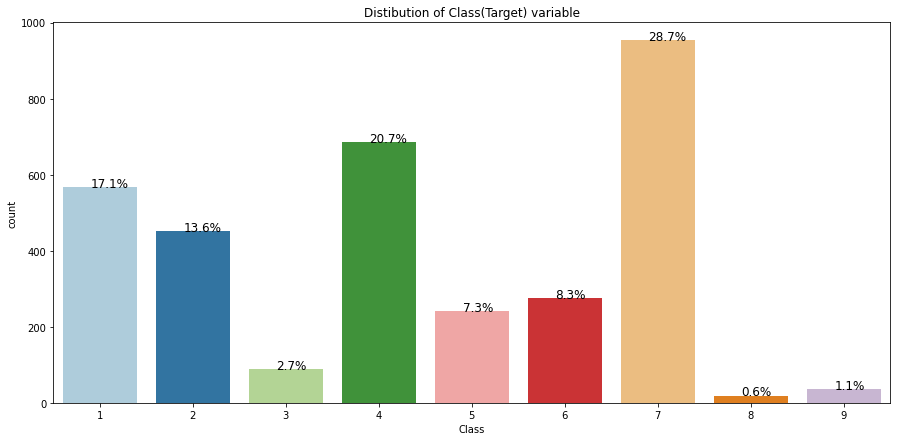

In [24]:
perc_on_bar('Class','Distibution of Class(Target) variable')

In [25]:
Y = final['Class'].values
final['Gene']=final['Gene'].str.replace('\s+', '_')
final['Variation']=final['Variation'].str.replace('\s+', '_')

In [26]:
def plot_categories(feature,title1):
    plt.figure(figsize=(15,8))
    count=final[feature].value_counts()
    sns.barplot(x=count[:15].values, y=count[:15].index)
    plt.title('(a)'+title1,fontsize=15)
    plt.xlabel('Counts', fontsize=13)
    plt.show()

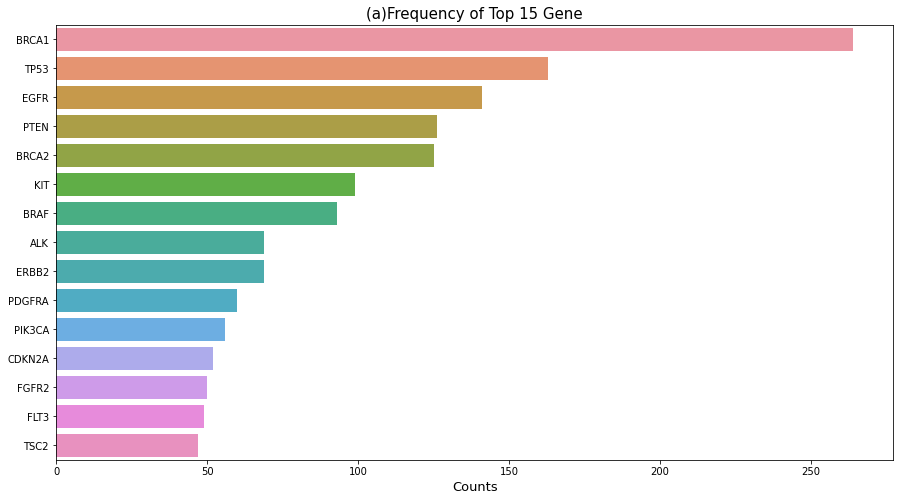

In [27]:
plot_categories("Gene",'Frequency of Top 15 Gene')

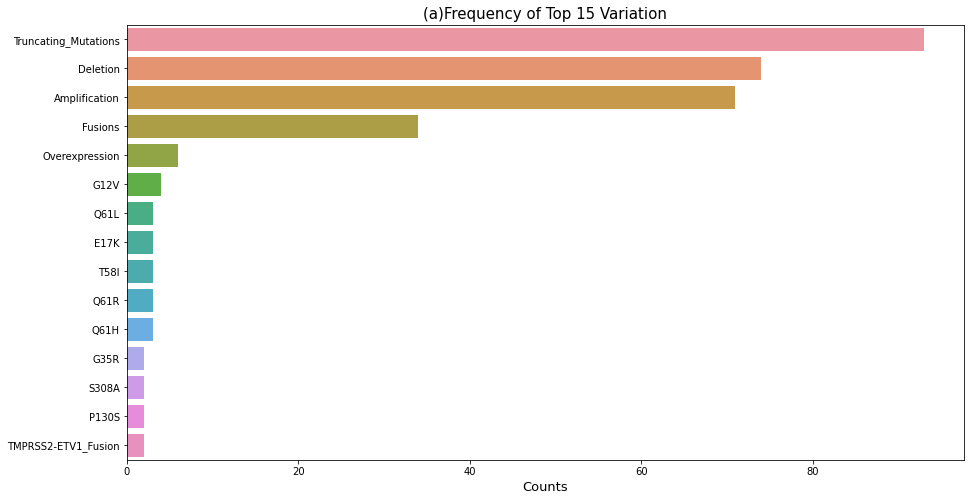

In [28]:
plot_categories("Variation",'Frequency of Top 15 Variation')

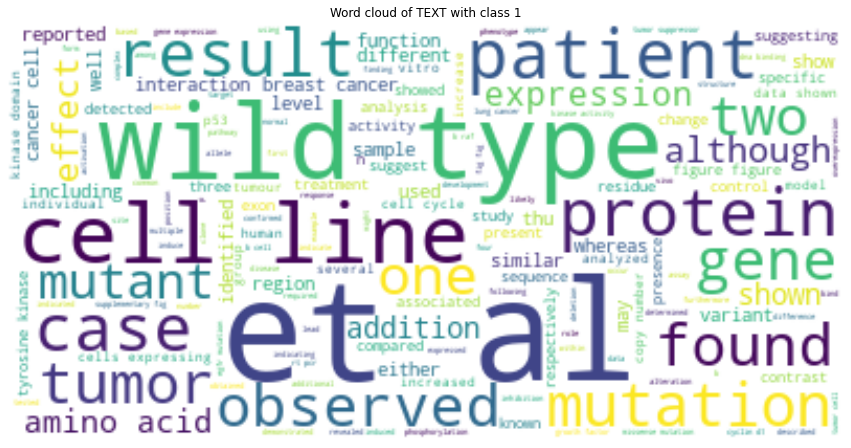

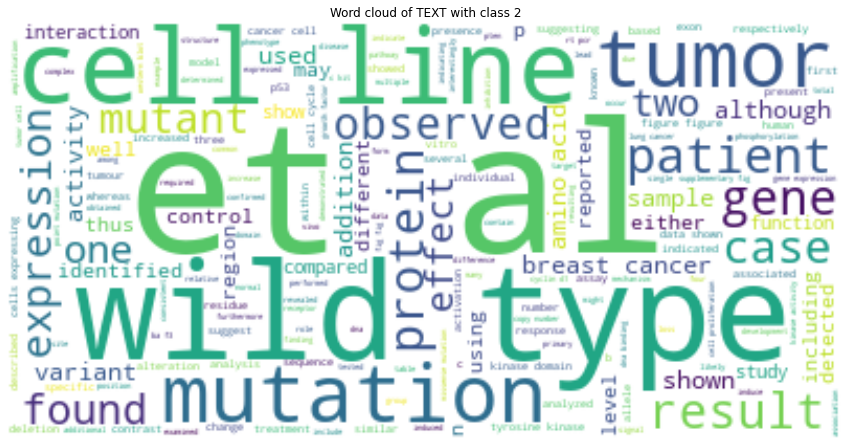

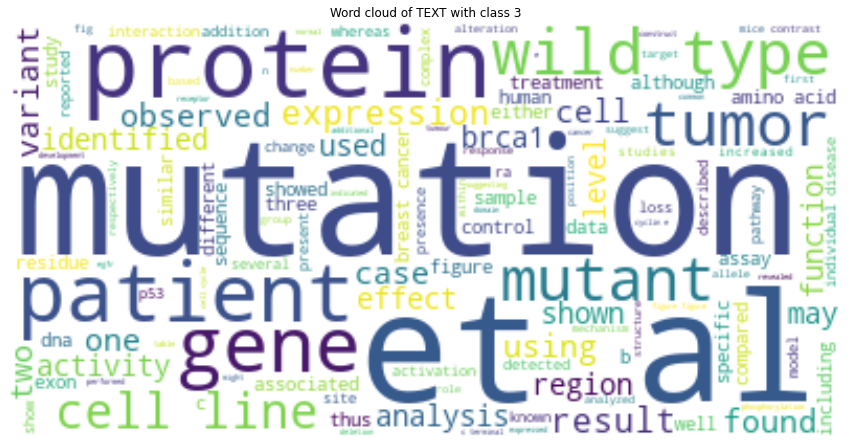

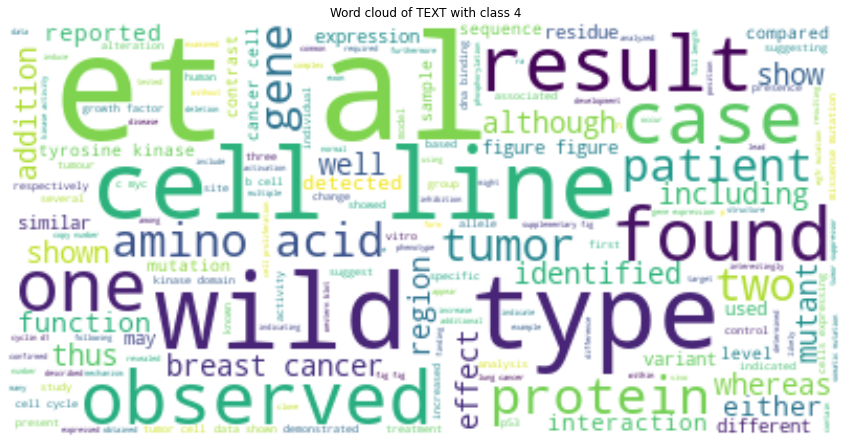

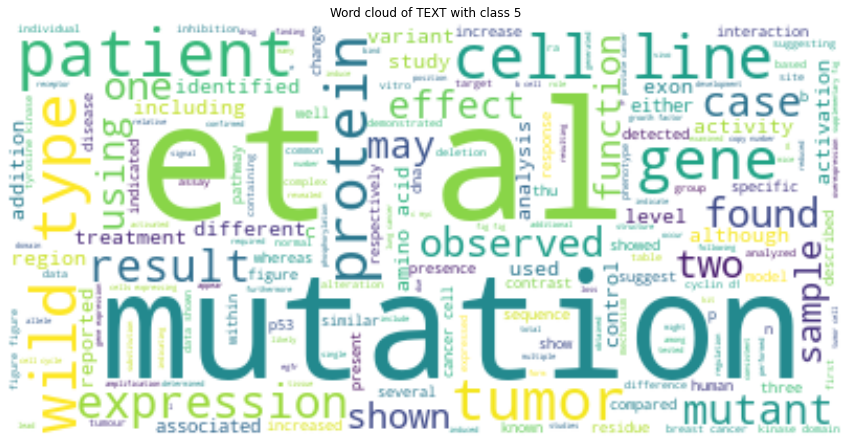

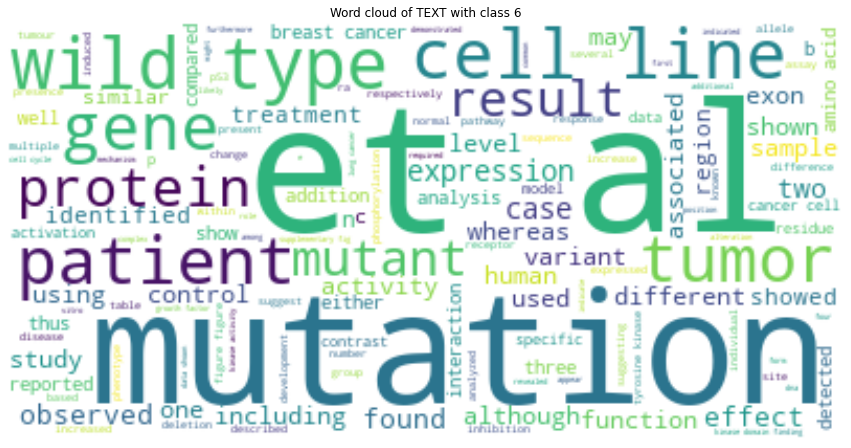

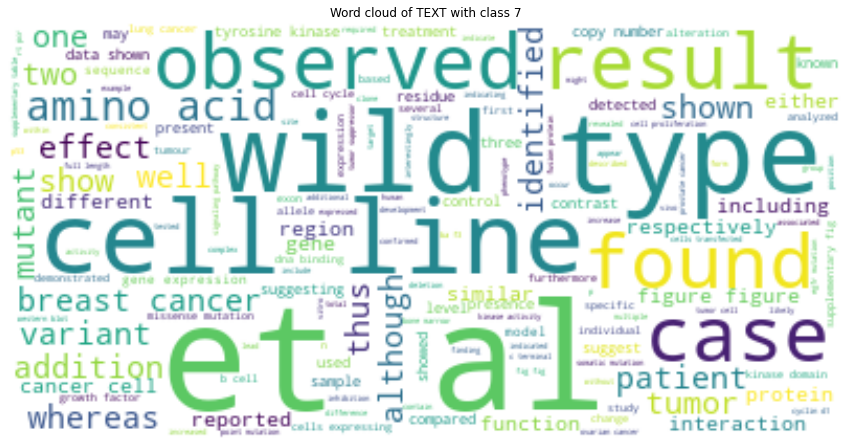

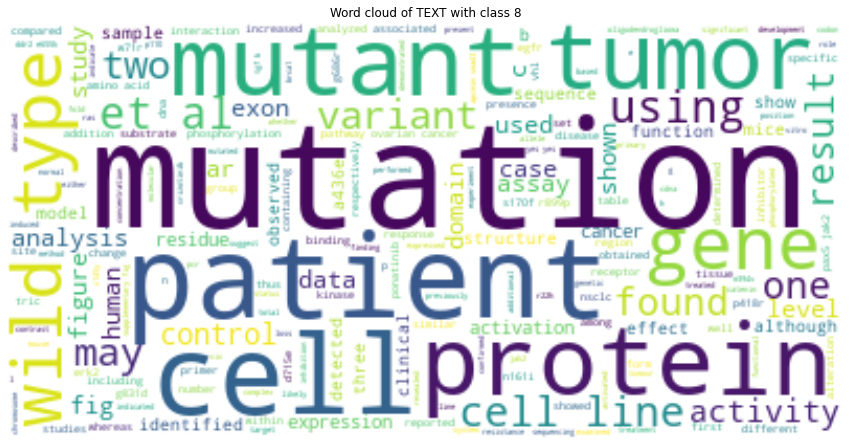

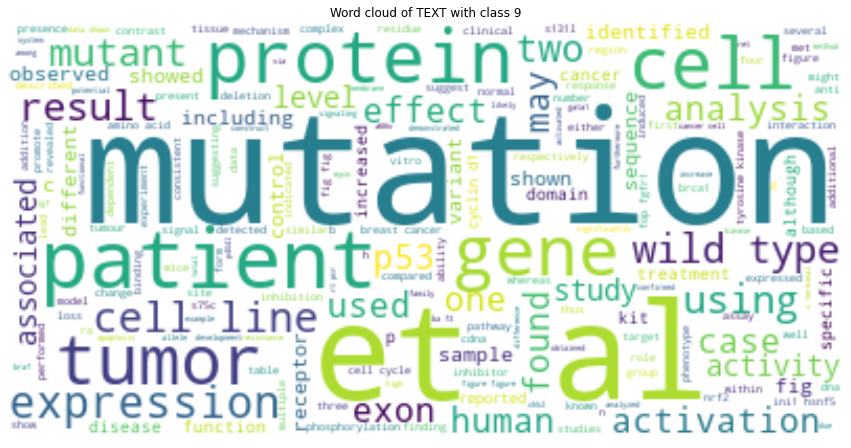

In [29]:
from wordcloud import WordCloud
for i in range(1,10):
    data=final[final['Class']==i]
    plt.figure(figsize = (15, 10))
    plt.title("Word cloud of TEXT with class {}".format(i))
    wc=WordCloud(background_color='white').generate(" ".join(data['TEXT'].astype(str)))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [30]:
final.to_csv('train_final.csv',index=False)
test_final.to_csv('test_final.csv',index=False)